In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv')
print(df.head())
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
print(len(df))

         date  value
0  2016-05-09   1201
1  2016-05-10   2329
2  2016-05-11   1716
3  2016-05-12  10539
4  2016-05-13   6933
1304


In [3]:
# Clean data
top = df['value'] < df['value'].quantile(0.975)
# print(top.head())
bottom = df['value'] > df['value'].quantile(0.025)
# print("bottom df")
# print(bottom)
# df = df[top & bottom]
# df = df[(df["value"] > df["value"].quantile(0.025)) & (df.value < df.value.quantile(0.975))]
df = df[(top) & (bottom)]
print(len(df))

1238


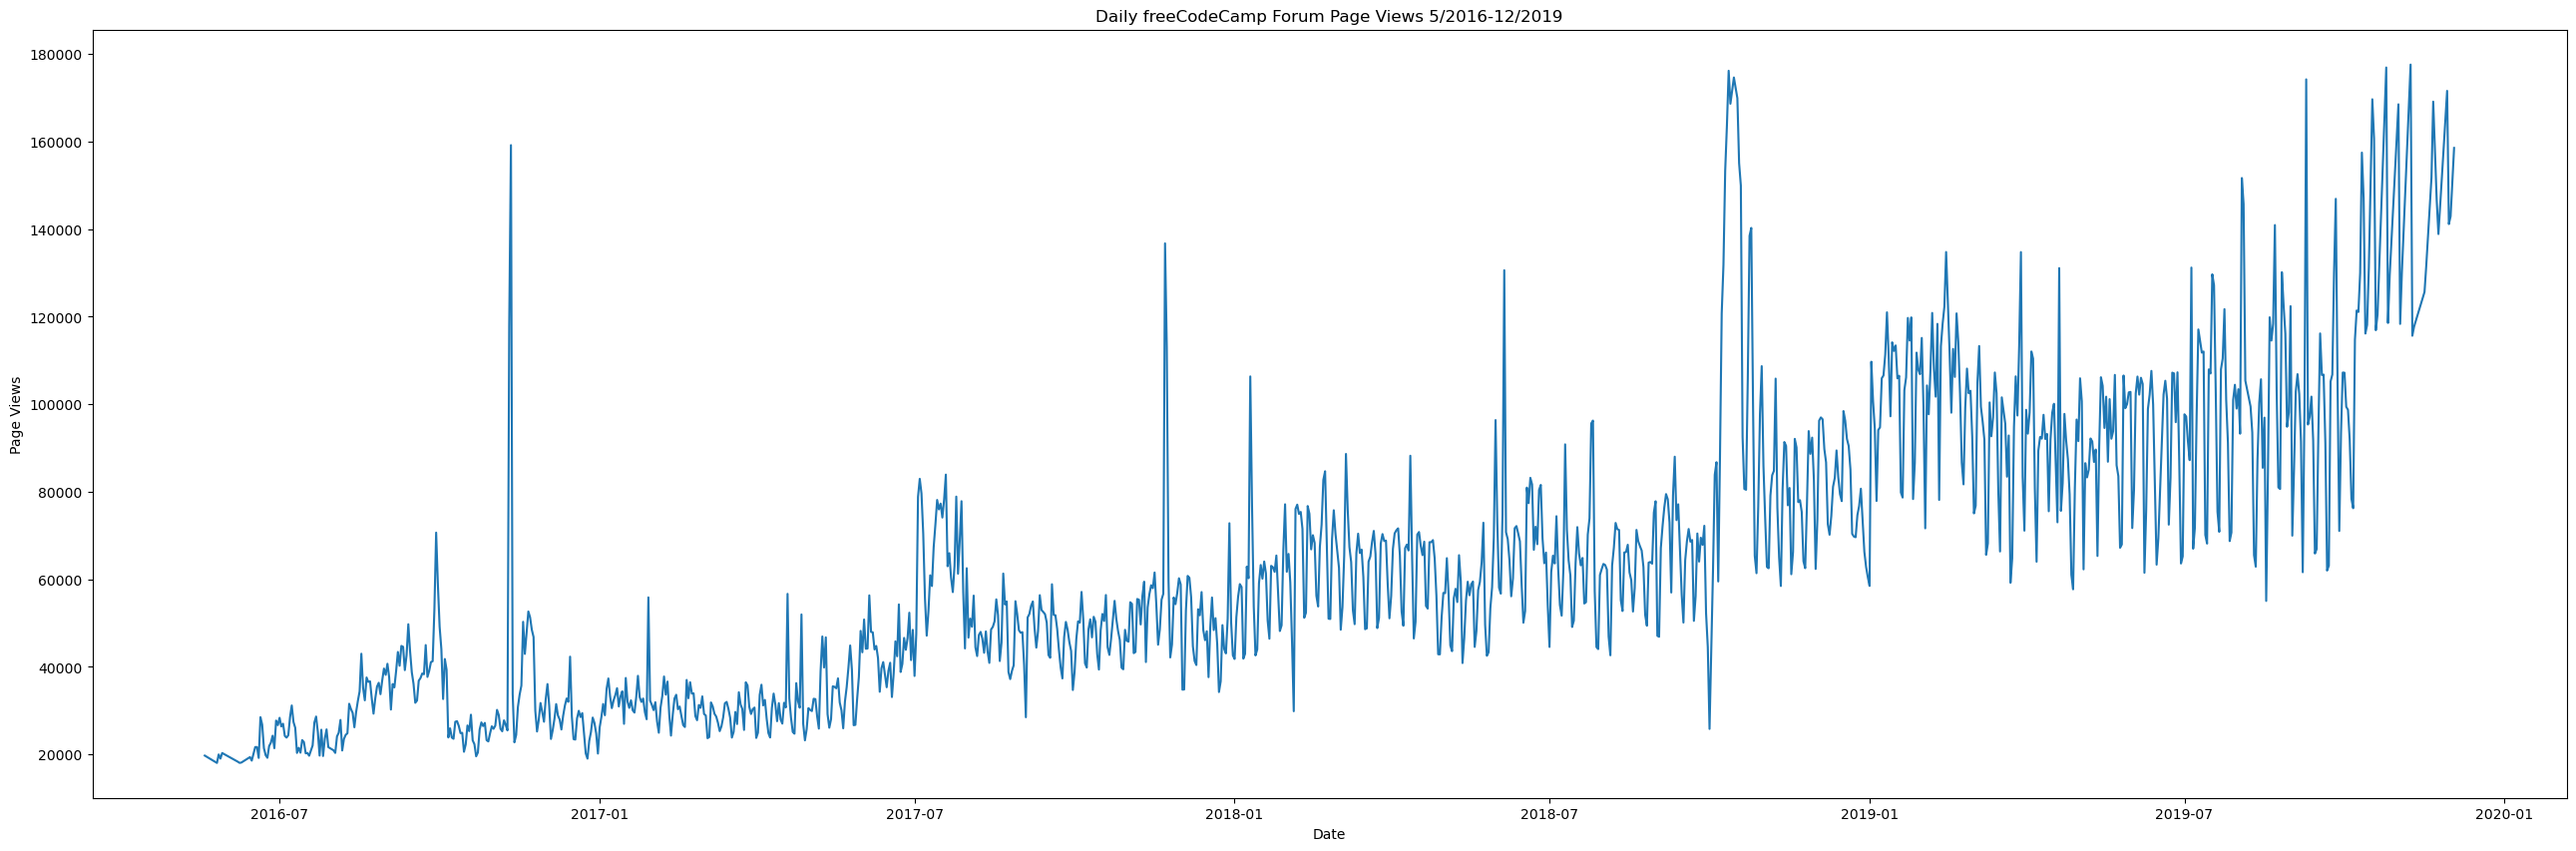

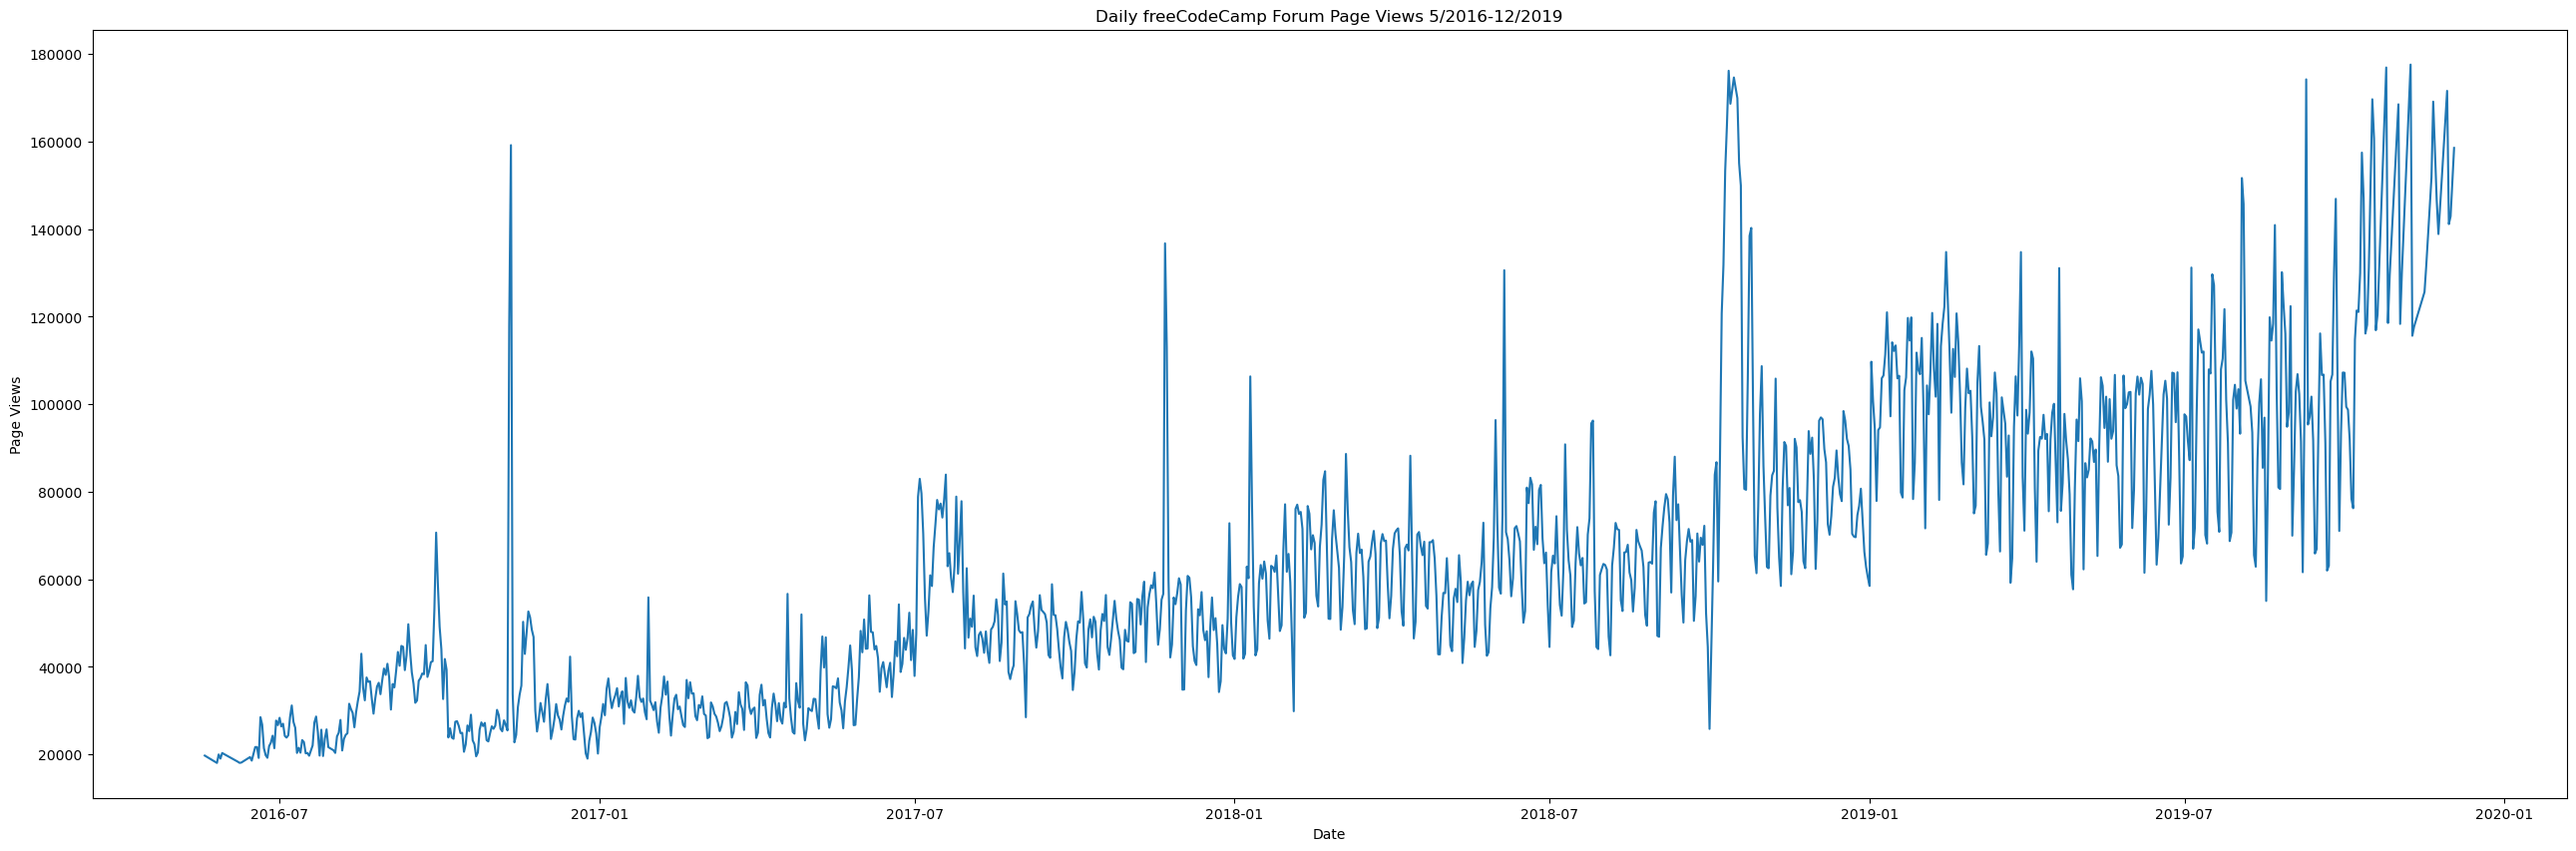

In [8]:
def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize=(32, 10), dpi=100)
    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")
    sns.lineplot(data=df, legend=False)

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

draw_line_plot()

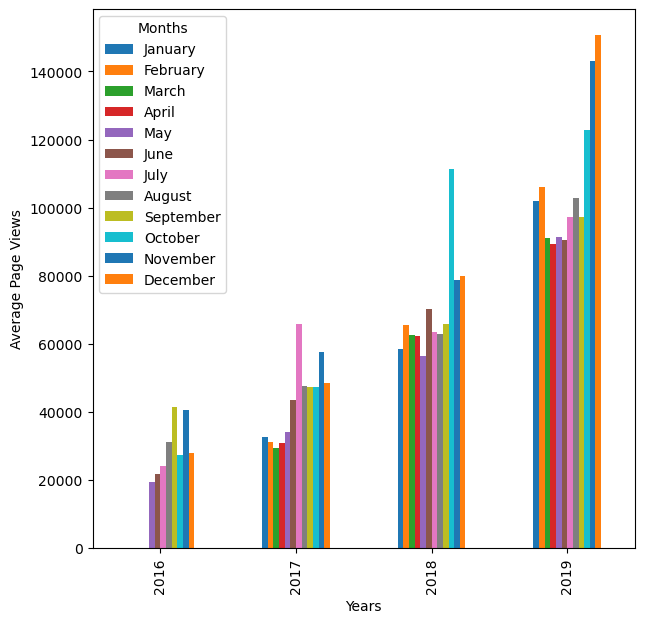

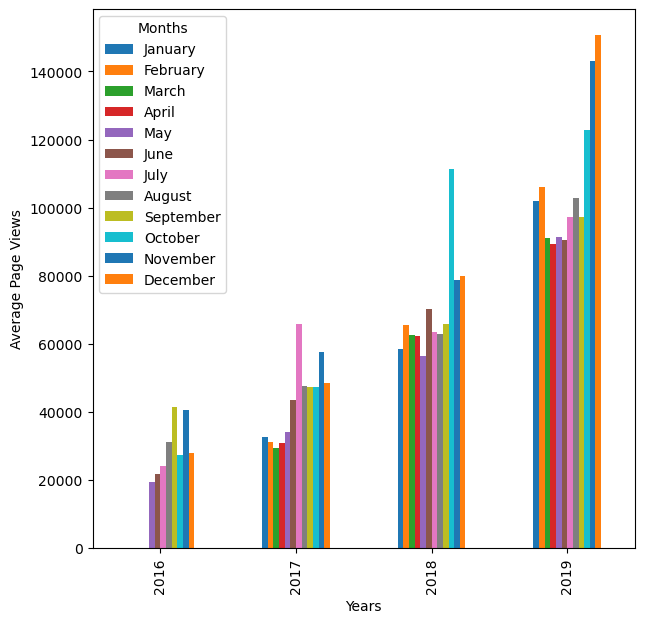

In [52]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar['Years'] = df.index.year
    df_bar['Months'] = df.index.month_name()

    df_bar_grouped = df_bar.groupby(['Years', 'Months'])['value'].mean()
    df_bar_grouped = df_bar_grouped.unstack(level='Months')
    df_bar_grouped = df_bar_grouped[['January', 'February', 'March', 'April', 'May',
                                'June', 'July', 'August', 'September', 'October', 'November', 'December']]

    # Draw bar plot
    fig = df_bar_grouped.plot.bar(figsize=(7,7)).figure
    
    plt.xlabel('Years')
    plt.ylabel('Average Page Views');
    plt.legend(title='Months');

    # Save image and return fig (don't change this part)
    fig.savefig("bar_plot.png")
    return fig

draw_bar_plot()

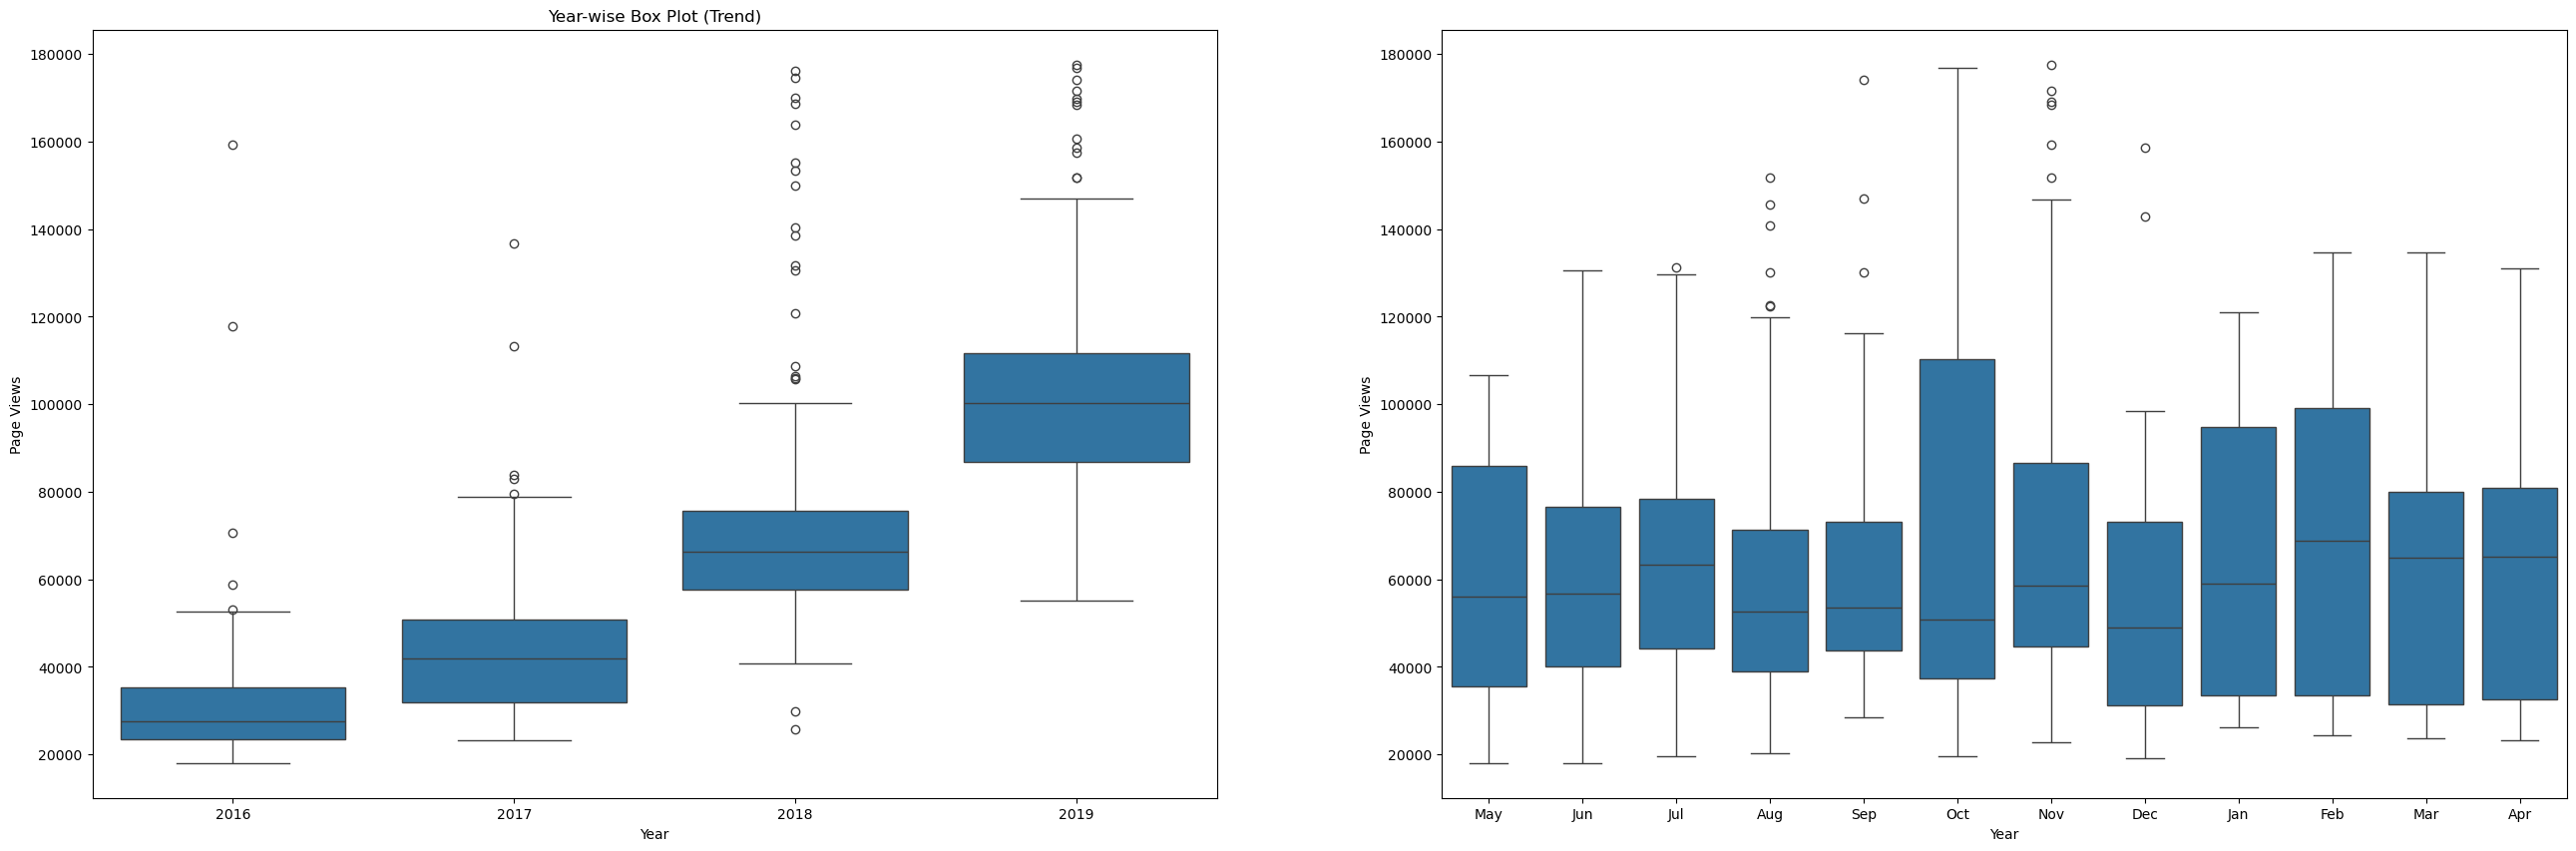

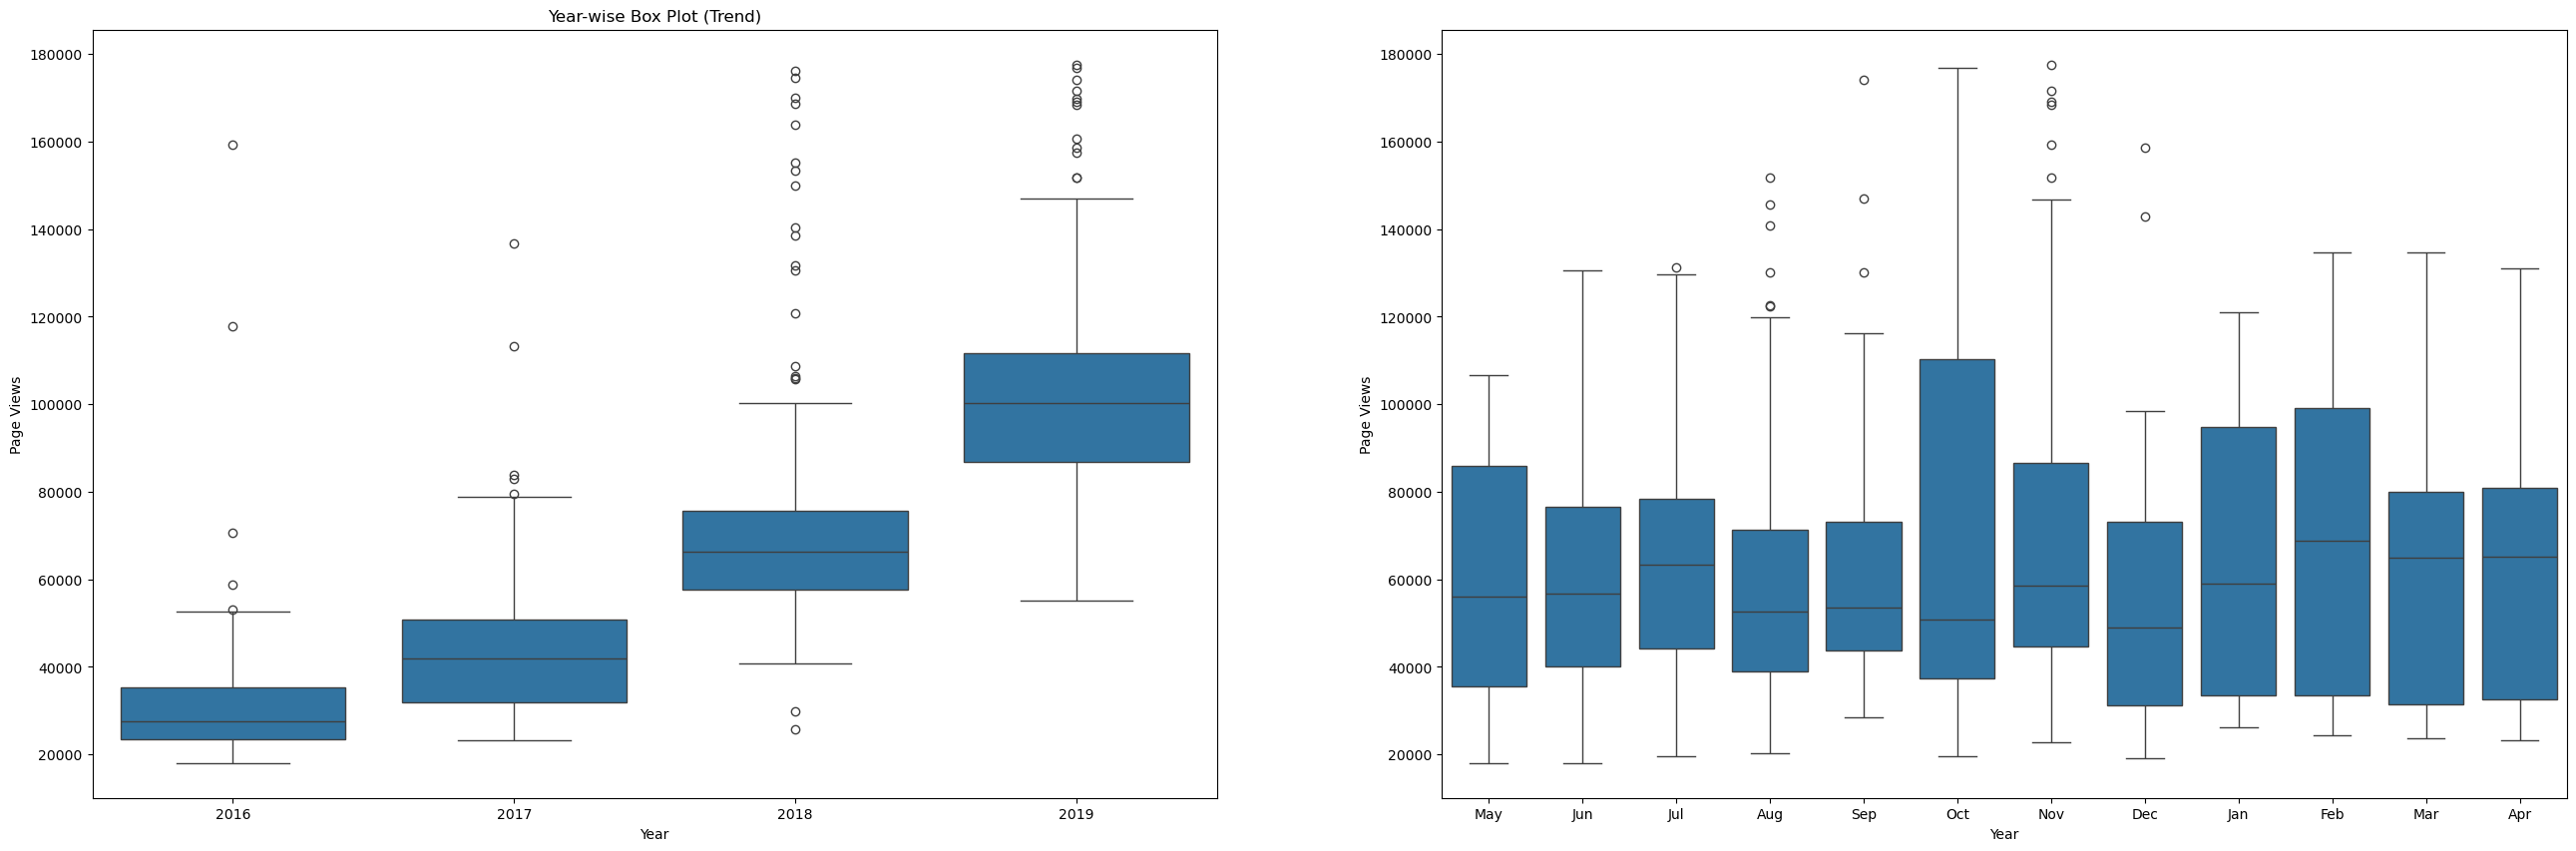

In [31]:
def draw_box_plot():
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box["year"] = [d.year for d in df_box.date]
    df_box["month"] = [d.strftime("%b") for d in df_box.date]
    # print(df_box.head()) 

    # df_box_groupby_year = df_box.groupby("year")["value"].sum().reset_index()
    # print(df_box_groupby_year.head())
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(32, 10), dpi=100)
    ax1.set_title("Year-wise Box Plot (Trend)")
    
    sns.boxplot(data=df_box, x="year", y="value", ax=ax1)
    ax1.set_xlabel("Year")
    ax1.set_ylabel("Page Views")

    month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    sns.boxplot(data=df_box, x="month", y="value", ax=ax2)
    ax2.set_xlabel("Year")
    ax2.set_ylabel("Page Views")

    # Save image and return fig (don't change this part)
    fig.savefig("box_plot.png")
    return fig

draw_box_plot()